# Visualize the query results that the Spark job produced

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Explore the solution dataset (the songplays table) where the artist and song columns are complete

In [2]:
results = pd.read_csv('../queries/songplays_full_data.csv')
results

,song_id,artist_id
0,SOCUITT12AB0187A32,ARKS2FE1187B99325D
1,SOSDZFY12A8C143718,AR748W61187B9B6AB8
2,SOTNWCI12AAF3B2028,ARS54I31187FB46721
3,SOBONKR12A58A7A7E0,AR5E44Z1187B9A1D74
4,SOLZOBD12AB0185720,ARPDVPJ1187B9ADBE9
...,...,...
314,SOKNMJE12A67AE0421,ARPD2KK1187B9B8B98
315,SOBNYLJ12AB0189934,AREIK8S1187B9A6071
316,SONHWUN12AC468C014,ARJIG5P1187B98D9DE
317,SOBONKR12A58A7A7E0,AR5E44Z1187B9A1D74


There are **319 rows** in the songplays table with complete information (ie. 319 events where a song from the events data matches a song from the songs data). This should be sufficient for some basic analysis.

### What are the top artists from the sparkify data?

[Text(0.5, 0, '')]

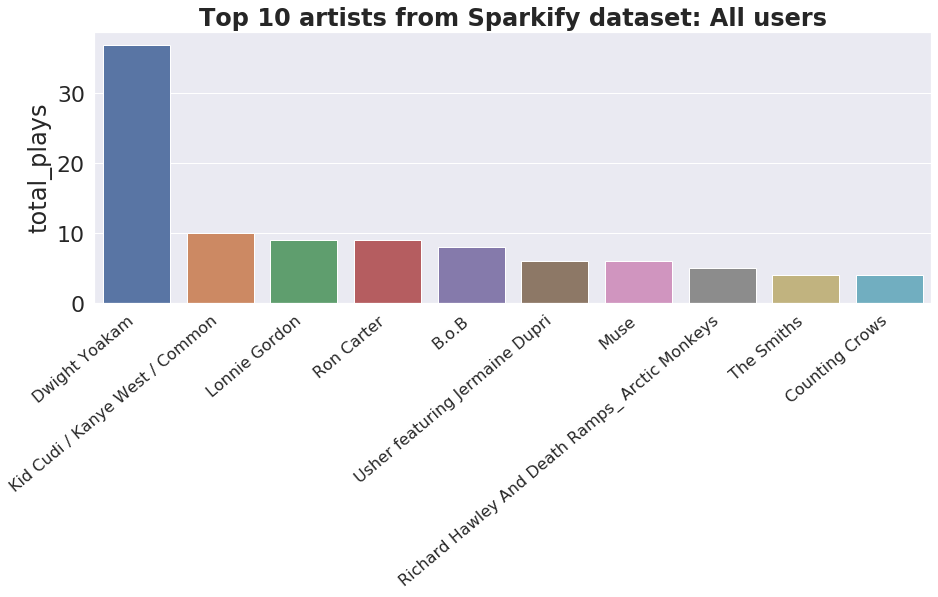

In [22]:
results = pd.read_csv('../queries/popular_artists.csv')
# Plot results as a Seaborn barplot (2 subplots)
fig, axes = plt.subplots(1, 1)
#fig.subplots_adjust(hspace=1)
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale = 2)
plt.rcParams["xtick.labelsize"] = 16
chart1 = sns.barplot(x="artist", y="total_plays", data=results, ax=axes);
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=40, horizontalalignment='right');
chart1.set_title("Top 10 artists from Sparkify dataset: All users", weight = "bold");
chart1.set(xlabel=None)

### What are the top listening locations from the sparkify data?

[Text(0.5, 0, '')]

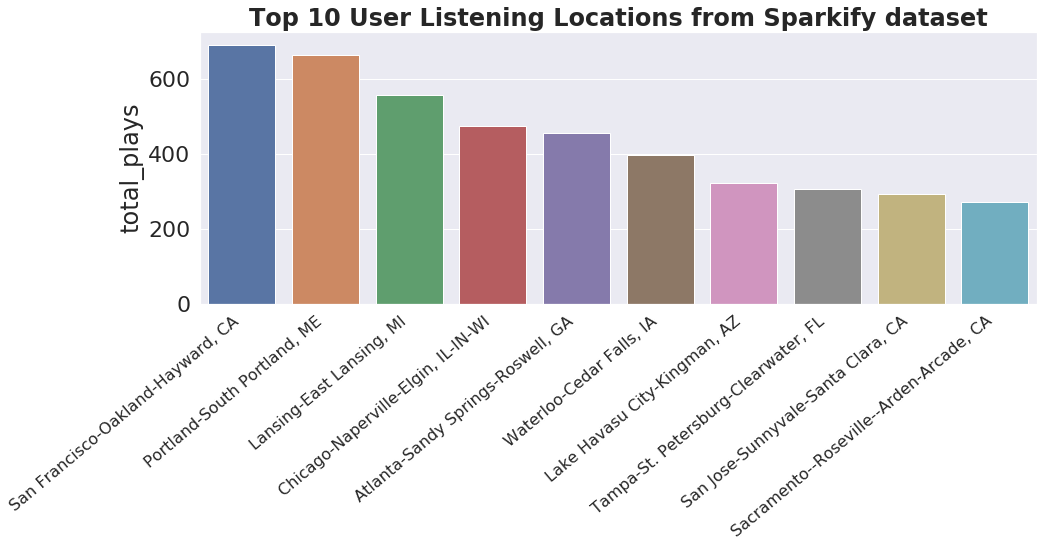

In [23]:
results = pd.read_csv('../queries/listening_locations.csv')
# Plot results as a Seaborn barplot (2 subplots)
fig, axes = plt.subplots(1, 1)
#fig.subplots_adjust(hspace=1)
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale = 2)
plt.rcParams["xtick.labelsize"] = 16
chart1 = sns.barplot(x="location", y="total_plays", data=results, ax=axes);
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=40, horizontalalignment='right');
chart1.set_title("Top 10 User Listening Locations from Sparkify dataset", weight = "bold");
chart1.set(xlabel=None)

### Check data skewness of the songs table based on its partitioning scheme

In [24]:
results = pd.read_csv('../queries/songs_skew.csv')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(results)

       year           artist_id  count
0         0  ARR3ONV1187B9A2F59      7
1         0  AROF4LP1187FB41C51      6
2         0  AR33DV81187FB4139B      6
3         0  ARSF0K11187B9AF319      6
4         0  ARQT8QM1187FB3E3CB      5
5         0  ARXOTQH1187FB57084      5
6         0  ARY5UO61187FB5271F      5
7         0  AR7KA5V1187FB44E6B      5
8         0  ARKJBR01187FB429D7      5
9         0  ARFWGRI1187FB52E45      5
10        0  AR32JLC1187B9946AF      5
11        0  ARU1MVY1187FB37B73      5
12        0  ARWV4871187B98BF87      5
13        0  ARFULGF1187FB5690C      5
14        0  ARE2G8K1187FB53219      5
15        0  ARBW1J61187B9B8B54      5
16        0  ARNLO5S1187B9B80CC      4
17        0  AR0A9UD1187B9AC521      4
18     2004  ARSZ7L31187FB4E610      4
19        0  ARJD43U1187B98EAB9      4
20        0  AR6C8EJ1187FB3F473      4
21        0  ARB0YWU1187FB37A96      4
22        0  AROBOIW11F4C84748F      4
23        0  AR1ZKBE1187FB53629      4
24        0  ARXPSCY12509

### Findings:
- 12,600 different partitions based on this scheme. Fairly uneven. Partitioning by just year may have been more even.
- All the year "0" entries had missing year data.

### Check data skewness of the time and songplays tables based on their identical partitioning schemes

In [25]:
results = pd.read_csv('../queries/time_skew.csv')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(results)

   year  month  count
0  2018     11   6813


### Findings:
- Only one partition for the entire dataset!!
- Both time and songplays table were partitioned by year and month